### 那么python都可以用来做什么？
#### 画图

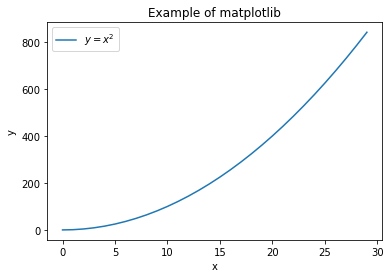

In [6]:
import numpy as np
from matplotlib import pyplot as plt
a = np.arange(30
             )
b = a**2
plt.plot(a, b, label='$y=x^2$')
plt.title('Example of matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### 爬虫
这里以爬取豆瓣电影<https://movie.douban.com/>中热门电影的名字和评分为例：
![](douban.jpg)

In [17]:
import requests
from bs4 import BeautifulSoup

url = 'https://movie.douban.com/'

soup = BeautifulSoup(requests.get(url).text, 'lxml') 
movies = soup.find_all(class_='ui-slide-content')[0].find_all('li')
movie_list = [(movie.get('data-title'), movie.get('data-rate')) for movie in movies if movie.get('data-title') != None]
movie_list

[('羞羞的铁拳', '7.3'),
 ('我的爸爸是森林之王 The Son Of Bigfoot', ''),
 ('天才枪手 ฉลาดเกมส์โกง', '8.4'),
 ('缝纫机乐队', '6.9'),
 ('追龙 追龍', '7.5'),
 ('英伦对决 The Foreigner', '7.3'),
 ('王牌特工2：黄金圈 Kingsman: The Golden Circle', '7.4'),
 ('十八洞村', ''),
 ('回到火星 The Space Between Us', '5.8'),
 ('情遇曼哈顿', '5.0'),
 ('怨灵2', ''),
 ('看不见的客人 Contratiempo', '8.7'),
 ('空天猎', '4.9'),
 ('战狼2', '7.4'),
 ('昆塔：反转星球', '6.4'),
 ('钢铁飞龙之再见奥特曼', '3.0'),
 ('大闹天宫', '6.7'),
 ('猩球崛起3：终极之战 War for the Planet of the Apes', '7.0'),
 ("王牌保镖 The Hitman's Bodyguard", '7.3'),
 ('你往哪里跑', '')]

#### 机器学习
这里以通过kmeans聚类算法分析吃鸡（PUBG）亚服前百名行为的程序为例，数据来源为<https://pubg.me/>。
![](pubg.jpg)

打开已爬好的五个服务器的数据：

In [3]:
import pandas as pd
import numpy as np
from get_data import open_exl
from pubg import asfloat

asia = open_exl('pubg_as.xls', 0)
eu = open_exl('pubg_eu.xls', 0)
na = open_exl('pubg_na.xls', 0)
oc = open_exl('pubg_oc.xls', 0)
sea = open_exl('pubg_sea.xls', 0)

data = np.vstack((asia, eu[1: ], na[1: ], oc[1: ], sea[1: ]))
df = pd.DataFrame({data[0, i]:data[1:, i] for i in range(data.shape[1])})
df

,AVG Distance In Vehicle,AVG Distance On Foot,AVG Survival Time,Headshot Kill Ratio,KDA,Top 10 Rate,Win Rate
0,1.14 km,6.90 km,22m,81.94%,64.44,77.63%,68.42%
1,4.62 km,2.51 km,28m,30.42%,37.00,90.00%,79.09%
2,3.00 km,2.01 km,24m,42.20%,13.69,66.22%,50.00%
3,2.72 km,1.22 km,26m,27.35%,4.53,67.44%,38.37%
4,2.97 km,2.18 km,25m,20.06%,43.46,76.00%,67.20%
5,3.30 km,2.17 km,24m,25.11%,6.74,61.37%,35.38%
6,8.10 km,2.75 km,26m,17.14%,2.60,64.74%,24.92%
7,0.05 km,5.56 km,22m,88.13%,133.00,81.67%,81.67%
8,4.24 km,2.04 km,25m,21.29%,4.70,60.83%,28.57%
9,1.79 km,3.10 km,24m,19.66%,55.30,75.00%,67.86%


用kmeans聚为5类：

In [4]:
from sklearn.cluster import KMeans
from get_data import open_exl

m = asfloat(data[1:, :3])
kmeans = KMeans(n_clusters=5).fit(m)
labels = kmeans.labels_
labels


array([0, 3, 3, 1, 3, 1, 1, 2, 1, 3, 3, 2, 0, 0, 0, 4, 4, 4, 1, 4, 1, 3, 0,
       4, 1, 3, 3, 3, 1, 0, 1, 1, 3, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 4, 1,
       3, 1, 0, 1, 4, 1, 1, 1, 1, 4, 1, 3, 4, 3, 0, 1, 1, 4, 1, 1, 3, 4, 1,
       1, 1, 4, 1, 1, 1, 1, 4, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 3, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 3, 3, 3, 0, 3, 3, 2,
       0, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 1, 3, 4, 1, 1, 3, 3, 3, 3, 1, 4, 1,
       1, 4, 3, 1, 4, 3, 1, 1, 4, 4, 3, 1, 1, 3, 1, 0, 1, 3, 3, 1, 4, 1, 3,
       4, 1, 3, 3, 1, 1, 4, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4,
       1, 1, 4, 4, 1, 2, 1, 3, 4, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4,
       4, 1,

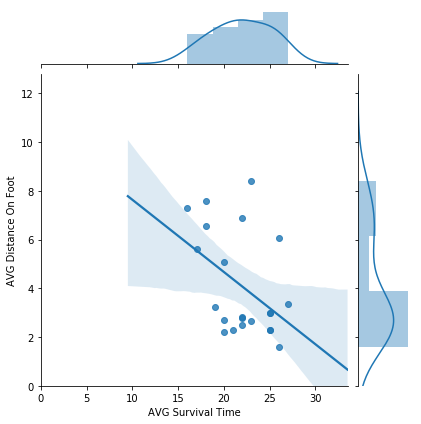

In [5]:
k = asfloat(data[1:, :])[labels==0]
dfk = pd.DataFrame({data[0, i]:k[:, i] for i in range(7)})
sns.JointGrid("AVG Survival Time","AVG Distance On Foot",dfk).plot(sns.regplot, sns.distplot)
plt.xlim((0, None))
plt.ylim((0, None))
plt.show()

In [6]:
corr=dfk['AVG Survival Time'].corr(dfk['AVG Distance On Foot'])
print(corr)

-0.439169695884


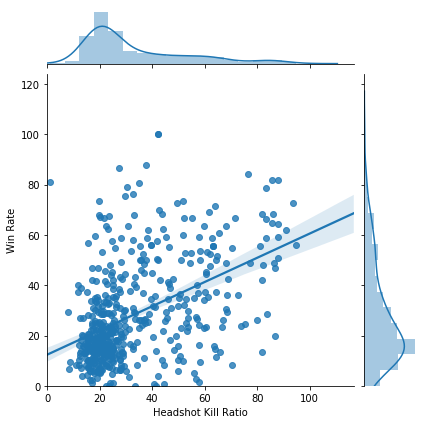

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#m = m[labels==3]
df = pd.DataFrame({data[0, i]:m[:, i] for i in range(3)})

# 绘图
sns.JointGrid("Headshot Kill Ratio","Win Rate",df).plot(sns.regplot, sns.distplot)
plt.xlim((0, None))
plt.ylim((0, None))
plt.show()

In [110]:
corr=df['Headshot Kill Ratio'].corr(df['Win Rate'])
print(corr)

-0.0090779384204


In [40]:
type(df['KDA'])

pandas.core.series.Series

画出样本点与各类中心：

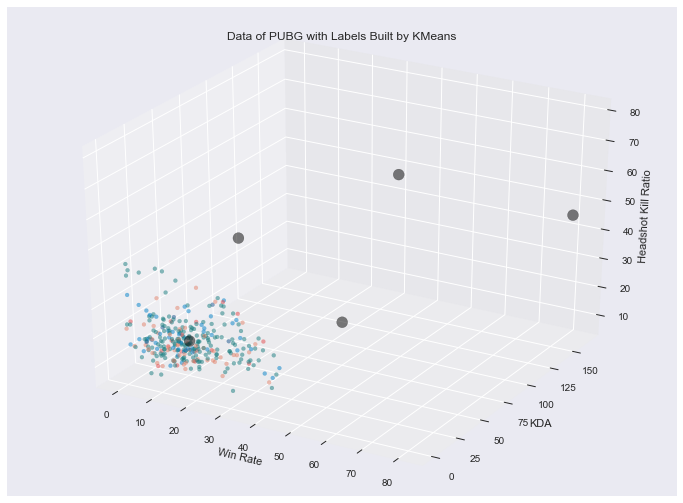

In [99]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

colors = ['#E4846C', '#19548E', '#E44B4E', '#197D7F', '#0282C9']
c_list = [colors[labels[i]] for i in range(m.shape[0])]

center = kmeans.cluster_centers_

plt.figure(figsize=(12, 9))
ax1 = plt.subplot(111,projection='3d')
x,y,z = m[:,0],m[:,1],m[:,2]

x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 2]
ax1.scatter(x, y, z, s=15, color=c_list, alpha=0.5)
ax1.scatter(x_c, y_c, z_c, s=120, alpha=0.5, c='black')
ax1.set_title('Data of PUBG with Labels Built by KMeans')
ax1.set_zlabel('Headshot Kill Ratio')
ax1.set_ylabel('KDA')
ax1.set_xlabel('Win Rate')
plt.show()

AVG Distance On Foot的分布：

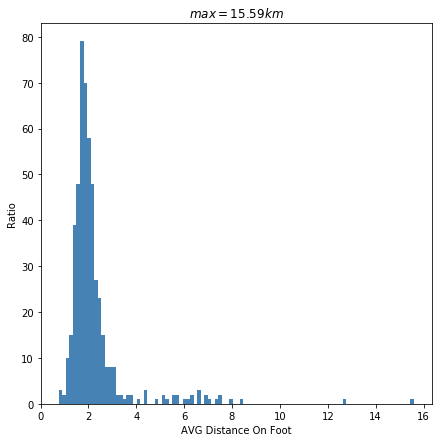

In [7]:
avg_dis_on_foot = asfloat(data[1:, -2:])
fig = plt.figure(figsize=(7,7))
max = avg_dis_on_foot[:, 0].max()
plt.hist(avg_dis_on_foot[:, 0], bins=100, color='steelblue')
plt.xlabel('AVG Distance On Foot')
plt.ylabel('Ratio')
plt.title('$max=%.2fkm$'% max)
plt.show()

再画出带标签的图像：

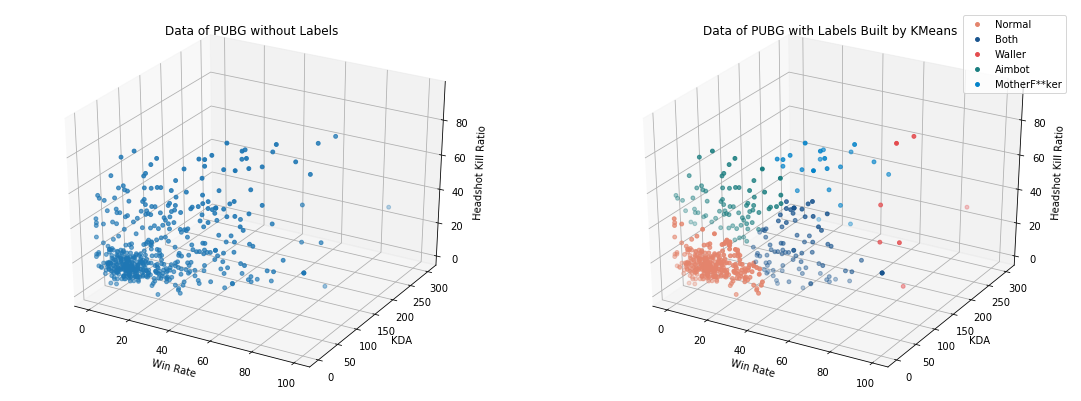

In [8]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

colors = ['#E4846C', '#19548E', '#E44B4E', '#197D7F', '#0282C9']
label_list = ['Normal', 'Both', 'Waller', 'Aimbot', 'MotherF**ker']

plt.figure(figsize=(19, 7))
ax = plt.subplot(122,projection='3d')
for i in range(5):
    c = m[labels == i]
    x,y,z = c[:,0],c[:,1],c[:,2]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])

ax.legend()
ax.set_title('Data of PUBG with Labels Built by KMeans')
ax.set_zlabel('Headshot Kill Ratio') #坐标轴
ax.set_ylabel('KDA')
ax.set_xlabel('Win Rate')

ax1 = plt.subplot(121,projection='3d')
x,y,z = m[:,0],m[:,1],m[:,2]
ax1.scatter(x, y, z, s=15)
ax1.set_title('Data of PUBG without Labels')
ax1.set_zlabel('Headshot Kill Ratio') #坐标轴
ax1.set_ylabel('KDA')
ax1.set_xlabel('Win Rate')


plt.show()

#### 高性能计算
这里使用的算例是**卷积反投影算法（CBP）**，也是**2017年高教杯全国大学生数学建模竞赛A题**中，需要选手实现的核心算法。
算法分两部分:
1. 计算接受谱 $g_n(k)$与某种滤波器 $\widehat{h}(k)$（代码中使用SL滤波器）的卷积 $\widehat{g}_n(k)$:
   
   $\widehat{g}_n(m)=\widehat{g}(md,n\Delta)=\sum\limits_{0}^{511}g_n(k)\widehat{h}(m-k)$
2. 计算卷积后信号的反投影：
   
   打公式太累惹...

先来看看使用**GPU并行计算**的速度：

function gpu_convolution runs 0.004s
function gpu_bp runs 0.012s


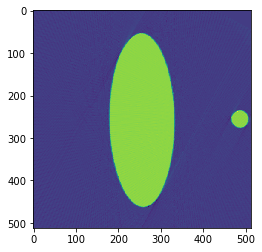

In [2]:
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import numpy as np
import matplotlib.pyplot as plt
from get_data import open_exl
from create_img import img_trans
from timer import run_time

@run_time
def gpu_convolution(spec):
    spec = spec.astype(np.float32)
    n, m = spec.shape
    x, y = n//32+1, m//32+1
    mod = SourceModule('''
          __device__ float h(int n)
          {   
              const float pi = 3.141592;
              return -2/(pi*pi * (4*n*n-1));
          }
    
    
          __global__ void convolution(float* sig, const float* spec)
          {
              int n = 512;
              int m = 180;
              int i = blockIdx.x*32 + threadIdx.x;
              int j = blockIdx.y*32 + threadIdx.y;
              if (i < n && j < m)
              {
                  int idx = i*m + j;
                  float g = 0;
                  for (int k=0; k<n; k++)
                  {
                      g += spec[k*m+j]*h(i-k);
                  }
                  sig[idx] = g;
              }
          }
          ''')
    sig = np.empty((n, m), dtype=np.float32)
    func = mod.get_function("convolution")
    func(cuda.Out(sig), cuda.In(spec), block=(32, 32, 1), 
         grid=(x, y))
    return sig

@run_time
def gpu_bp(sig):
    sig = sig.astype(np.float32)
    x, y = 512//32+1, 512//32+1
    mod = SourceModule('''
          __global__ void bp(float* img, const float* sig)
          {
              const float pi = 3.141592;
              float theta, d, r;
              int x, y, left;
              int n = 512;
              int m = 180;
              int i = blockIdx.x*32 + threadIdx.x;
              int j = blockIdx.y*32 + threadIdx.y;
              if (i < n && j < n)
              {
                  int idx = i*n + j;
                  float px = 0;
                  for (int k=0; k<m; k++)
                  {
                      theta = k*pi/180;
                      x = j-255;
                      y = 511-i-255;
                      d = x*cos(theta-pi/2)+y*sin(theta-pi/2)+255;
                      if (0 <= d && d < n-1)
                      {  
                          left = int(d);
                          r = d-left;
                          px += (1-r)*sig[left*180+k]+r*sig[(left+1)*180+k];
                      }
                  }
                  img[idx] = px/m;
              }
          }
          ''')
    img = np.empty((512, 512), dtype=np.float32)
    func = mod.get_function("bp")
    func(cuda.Out(img), cuda.In(sig), block=(32, 32, 1), 
         grid=(x, y))
    return img


spec = open_exl('A.xls', 1)
img = img_trans(gpu_bp(gpu_convolution(spec)), shape=(512, 512))
plt.imshow(img)
plt.show()

再来看看使用**CPU串行计算**的速度：

function convolution runs 54.402s
function backprojection2 runs 110.820s


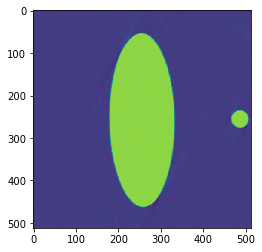

In [3]:
from get_data import open_exl
from create_img import sl, convolution, backprojection2


spec = open_exl('A.xls', 1)
img = img_trans(backprojection2(convolution(spec, sl)), shape=(512, 512))
plt.imshow(img)
plt.show()

# python语言与计算机科学导论
### 内容设置
0. 计算机基础知识
1. python（3.x)基本语法
2. python常用内建库（math, sys, os, re...），常用第三方库（numpy, matplotlib, scipy...)
3. 网络爬虫原理与常用框架（scrapy）
4. 科学计算实例
5. 体系结构简述：CPU与GPU
6. 基于CUDA的高性能计算（HPC on GPU）
7. 机器学习基本方法（还没想好怎么讲XD）


## python的工作原理
python是一门动态语言，也叫解释型语言（与例如C/C++的编译型语言相对）。在python代码运行时，python解释器本质上执行了下面的步骤：
1. lexing： **词法分析**，就是把一个句子分解成 token。      
2. parsing：**剖析**，就是把这些 token 组装成一个逻辑结构 （正式的叫法是AST抽象语法树）
3. compiling：**编译**，把这个逻辑结构转化成一个或者多个code object （代码对象）
4. interpreting：**解释**，执行每个code object 代表的代码。

还有一种比较简单的说法是这样的：
> Python 程序的执行过程就是，它先把代码**编译**成 bytecode （**字节码**）指令，交给**虚拟机**，逐条**解释执行** bytecode 指令。

## python解释器
python的解释器本身也是一个应用程序，它可以被很多种语言实现，常见的python解释器有：
* CPython
    
    CPython是python官方网站的解释器，也是使用最为广泛的解释器。由于它是用C语言开发的，所以叫做CPython。在命令行下运行python就是启动CPython解释器。
    
    
* IPython

    IPython是基于CPython之上的一个交互式解释器，也就是说，IPython只是在交互方式上有所增强，但是执行Python代码的功能和CPython是完全一样的。好比很多国产浏览器虽然外观不同，但内核其实都是调用了IE/Chrome。
    
    Anaconda3自带并推荐使用的解释器即IPython，在课程中涉及到交互的地方，也统一使用IPython。
    
    
* PyPy

    真·黑科技
    
    PyPy是用Python实现的Python解释器，它的目标是执行速度。PyPy采用JIT技术，对Python代码进行**动态编译**（注意**不是解释**），所以可以显著提高Python代码的执行速度。

    绝大部分Python代码都可以在PyPy下运行，但是PyPy和CPython有一些是不同的，这就导致相同的Python代码在两种解释器下执行可能会有不同的结果。如果你的代码要放到PyPy下执行，就需要了解PyPy和CPython的不同点。


* Jython

    Jython是运行在Java平台上的Python解释器，可以直接把Python代码编译成Java字节码执行。
    
    
* IronPython

    IronPython和Jython类似，只不过IronPython是运行在微软.Net平台上的Python解释器，可以直接把Python代码编译成.Net的字节码。

下面开始主干参考了[廖雪峰大大的教程](https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000)

## python语法特点
Python是一种计算机编程语言。计算机编程语言和我们日常使用的自然语言有所不同，最大的区别就是，自然语言在不同的语境下有不同的理解，而计算机要根据编程语言执行任务，就必须保证编程语言写出的程序决不能有歧义，所以，任何一种编程语言都有自己的一套语法，编译器或者解释器就是负责把符合语法的程序代码转换成CPU能够执行的机器码，然后执行。Python也不例外。
Python的语法比较简单，采用缩进方式，写出来的代码就像下面的样子：
```python
# print absolute value of an integer:
a = 100
if a >= 0:
    print(a)
else:
    print(-a)
```
**以```#```开头的语句是注释**，注释是给人看的，可以是任意内容，解释器会忽略掉注释。其他每一行都是一个语句，**当语句以冒号```:```结尾时，缩进的语句视为代码块**。

~~顺手来黑一发C++~~,同样的代码用C++写会是这样：
```c++
// print absolute value of an integer:
int main()
{
    int a = 100;
    if (a >= 0)
    {
        cout<<a<<endl;
    }
    else
    {
        cout<<-a<<endl;
    }
    return 0;
}
```

### 不同的语言对代码块的处理
* python
```python
    if (condition):
        # do something
    else:
        # do something
```
* C++
```cpp
    if (condition)
    {
        // do something
    }
    else
    {
        // do something
    }
```
* matlab
``` matlab
    if condition
        % do something
    else
        % do something
    end
```

### 谈谈缩进
> 每一个合格的python程序员都应该有一把游标卡尺。

![](QQ截图20171014235510.jpg)

缩进有利有弊。好处是强迫你写出格式化的代码，但没有规定缩进是几个空格还是Tab。按照约定俗成的管理，**应该始终坚持使用4个空格的缩进**。

缩进的另一个好处是强迫你写出缩进较少的代码，你会倾向于把一段很长的代码拆分成若干函数，从而得到缩进较少的代码。

缩进的坏处就是“复制－粘贴”功能失效了，这是最坑爹的地方。当你重构代码时，粘贴过去的代码必须重新检查缩进是否正确。此外，IDE很难像格式化Java代码那样格式化Python代码。

最后，请务必注意，**Python程序是大小写敏感的**，如果写错了大小写，程序会报错。

## python数据类型
计算机顾名思义就是可以做数学计算的机器，因此，计算机程序理所当然地可以处理各种数值。但是，计算机能处理的远不止数值，还可以处理文本、图形、音频、视频、网页等各种各样的数据，不同的数据，需要定义不同的数据类型。在Python中，能够直接处理的数据类型有以下几种：
### 整数（int）
Python可以处理任意大小的整数，当然包括负整数，在程序中的表示方法和数学上的写法一模一样，例如：1，100，-8080，0，等等。

计算机由于使用二进制，所以，有时候用十六进制表示整数比较方便，十六进制用0x前缀和0-9，a-f表示，例如：0xff00，0xa5b4c3d2，等等。

In [8]:
type(1)

int

In [1]:
3+50

53

In [2]:
3*50

150

In [4]:
50//10

5

### 浮点数（float）

浮点数也就是小数，之所以称为浮点数，是因为按照科学记数法表示时，一个浮点数的小数点位置是可变的，比如，$1.23\times10^9$和$12.3\times10^8$是完全相等的。浮点数可以用数学写法，如1.23，3.14，-9.01，等等。但是对于很大或很小的浮点数，就必须用科学计数法表示，把10用e替代，$1.23\times10^9$就是```1.23e9```，或者```12.3e8```，0.000012可以写成```1.2e-5```，等等。

整数和浮点数在计算机内部存储的方式是不同的，**整数运算永远是精确的**，而**浮点数运算则可能会有四舍五入的误差**。

In [9]:
type(3.14)

float

In [7]:
3.14*1.41

4.4274

### 字符串（str）

字符串是以**单引号**'或**双引号**"括起来的任意文本，比如```'abc'```，```"xyz"```等等。请注意，''或""本身只是一种表示方式，不是字符串的一部分，因此，字符串```'abc'```只有a，b，c这3个字符。如果'本身也是一个字符，那就可以用""括起来，比如```"I'm OK"```包含的字符是I，'，m，空格，O，K这6个字符。

In [10]:
type('python')

str

如果字符串内部既包含```'```又包含```"```怎么办？可以用**转义字符**```\```来标识，比如：

In [6]:
print('I\'m \"OK\"!')

I'm "OK"!


转义字符\可以转义很多字符，比如```\n```表示换行，```\t```表示制表符，字符\本身也要转义，所以\\表示的字符就是\，可以在Python的交互式命令行用```print()```**打印**字符串看看：

In [11]:
print('I\'m ok.')

I'm ok.


In [12]:
print('I\'m learning\nPython.')

I'm learning
Python.


In [13]:
print('\\\n\\')

\
\


如果字符串里面有很多字符都需要转义，就需要加很多\，为了简化，Python还允许用r''表示''内部的字符串默认不转义，可以自己试试：

In [16]:
print('\\\t\\')
print(r'\\\t\\')

\	\
\\\t\\


如果字符串内部有很多换行，用\n写在一行里不好阅读，为了简化，Python允许用'''...'''的格式表示多行内容：

In [18]:
print('''line1
line2
line3''')

line1
line2
line3


### 布尔值（bool）

布尔值和布尔代数的表示完全一致，一个布尔值只有```True```、```False```两种值，要么是```True```，要么是```False```，在Python中，可以直接用```True```、```False```表示布尔值（请注意大小写），也可以通过布尔运算计算出来：

In [19]:
type(True)

bool

In [20]:
3 > 2

True

In [21]:
2 < 1

False

布尔值可以用```and```、```o```r和```not```运算。

```and```运算是与运算，只有所有都为```True```，and运算结果才是```True```：

In [23]:
True and True

True

In [24]:
True and False

False

```or``` 运算是或运算，只要其中有一个为```True```，```or```运算结果就是```True```：

In [25]:
True or True

True

In [26]:
True or False

True

In [27]:
False or False

False

```not```运算是非运算，它是一个单目运算符，把```True```变成```False```，```False```变成```True```：

In [28]:
not True 

False

In [30]:
not False

True

布尔值经常用在条件判断中，比如：
```python
if age >= 18:
    print('adult')
else:
    print('teenager')
```

### 空值（NoneType）

空值是Python里一个特殊的值，用```None```表示。```None```不能理解为0，因为0是有意义的，而```None```是一个特殊的空值。

此外，Python还提供了列表、字典等多种数据类型，还允许创建自定义数据类型，我们后面会继续讲到。

In [31]:
type(None)

NoneType

### 变量

变量的概念基本上和初中代数的方程变量是一致的，只是在计算机程序中，**变量不仅可以是数字，还可以是任意数据类型**。

变量在程序中就是用一个变量名表示了，**变量名必须是大小写英文、数字和_的组合，且不能用数字开头**，比如：

In [32]:
a = 1

变量a是一个整数。

In [33]:
t_007 = 'T007'

变量```t_007```是一个字符串。

In [34]:
answer = True

变量```answer```是一个布尔值```True```。

在Python中，**等号**```=```是**赋值**语句，可以把任意数据类型赋值给变量，**同一个变量可以反复赋值**，而且可以是不同类型的变量，例如：

In [35]:
a = 123 # a是整数
print(a)
a = 'ABC' # a变为字符串
print(a)

123
ABC


这种**变量本身类型不固定的语言称之为动态语言**，与之对应的是静态语言。**静态语言在定义变量时必须指定变量类型**，如果赋值的时候类型不匹配，就会报错。例如C++是静态语言，赋值语句如下（// 表示注释）：
```cpp
int a = 123; // a是整数类型变量
a = "ABC"; // 错误：不能把字符串赋给整型变量
```

和静态语言相比，动态语言更灵活，就是这个原因。

最后，理解**变量在计算机内存中的表示**也非常重要。当我们写：
```python
a = 'ABC'
```
时，Python解释器干了两件事情：
1. 在内存中创建了一个```'ABC'```的字符串；
2. 在内存中创建了一个名为```a```的变量，并把它指向```'ABC'```。

也可以把一个变量a赋值给另一个变量b，这个操作实际上是把变量b指向变量a所指向的数据，例如下面的代码：

In [36]:
a = 'ABC'
b = a
a = 'XYZ'
print(b)

ABC


## 输入与输出
### 输出

In [43]:
print('hello, world!')

hello, world!


In [45]:
print('hello, world!\n你好，世界！\nこんにちは世界！')

hello, world!
你好，世界！
こんにちは世界！


```print(info)```可以输出info。

### 输入

In [1]:
a = int(input('pls enter a number:\n'))
a = a**2
print('the square of input number is:\n'+str(a))

pls enter a number:
5
the square of input number is:
25


```input(notice)```会在屏幕上输出notice，并以字符串(**str**)类型返回输入的内容。